In [2]:
"""
This notebook generates the ISM shuffle plots for 5000 randomly chosen CREs (Fig. 4B).
"""

'\nThis notebook generates the ISM shuffle plots for 5000 randomly chosen CREs (Fig. 4B).\n'

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
import pybedtools

In [4]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "mutagenesis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -cvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/mutagenesis.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/mutagenesis.tar.gz


In [10]:
motif = "random"

server="cbsu"
path=f"/home2/ayh8/attribution_scores/{motif}_5000/"
ism_shuffle_scores_fp = f"ensemble_ism_shuffle_{motif}_oriented.npz"
pred_fp = f"{motif}_oriented_prediction.npz"
scratch = "/Users/adamhe/github/scratch/"

print(f"scp {server}:{os.path.join(path, ism_shuffle_scores_fp)} {scratch}")
print(f"scp {server}:{os.path.join(path, pred_fp)} {scratch}")

scp cbsu:/home2/ayh8/attribution_scores/random_5000/ensemble_ism_shuffle_random_oriented.npz /Users/adamhe/github/scratch/
scp cbsu:/home2/ayh8/attribution_scores/random_5000/random_oriented_prediction.npz /Users/adamhe/github/scratch/


In [12]:
ism_shuffle_scores = np.load(os.path.join(scratch, ism_shuffle_scores_fp))
corr = ism_shuffle_scores["corr_ism_shuffle"]
quantity = ism_shuffle_scores["quantity_ism_shuffle"]
log_quantity = ism_shuffle_scores["log_quantity_ism_shuffle"]

pred = np.load(os.path.join(scratch, pred_fp))
pred_tss = np.argmax(np.array(pred["track"])[:, :500], axis=1)
center = pred_tss + 250 - 50

In [13]:
corr_around_tss = np.array(
    [corr[i, center[i] - 200:center[i] + 200] for i in range(len(center))]
)
quantity_around_tss = np.array(
    [quantity[i, center[i] - 200:center[i] + 200] for i in range(len(center))]
)
log_quantity_around_tss = np.array(
    [log_quantity[i, center[i] - 200:center[i] + 200] for i in range(len(center))]
)

In [14]:
corr_2d = pd.DataFrame(
    {
        "pos": list(range(-200, 200)) * corr_around_tss.shape[0],
        "corr": corr_around_tss.reshape(corr_around_tss.shape[0] * corr_around_tss.shape[1],),
    }
)
quantity_2d = pd.DataFrame(
    {
        "pos": list(range(-200, 200)) * quantity_around_tss.shape[0],
        "quantity": quantity_around_tss.reshape(quantity_around_tss.shape[0] * quantity_around_tss.shape[1],),
    }
)
log_quantity_2d = pd.DataFrame(
    {
        "pos": list(range(-200, 200)) * log_quantity_around_tss.shape[0],
        "quantity": log_quantity_around_tss.reshape(log_quantity_around_tss.shape[0] * log_quantity_around_tss.shape[1],),
    }
)

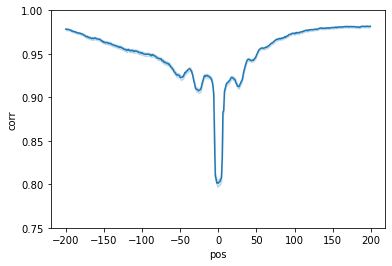

In [15]:
ax = sns.lineplot(data=corr_2d, x="pos", y="corr")
plt.ylim(0.75, 1)
plt.savefig(f"./{motif}_ism_shuffle_corr.pdf")

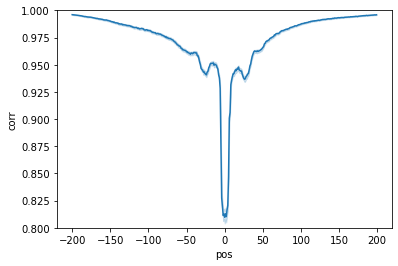

In [13]:
ax = sns.lineplot(data=corr_2d, x="pos", y="corr", estimator=np.median)
plt.ylim(0.8, 1)
plt.savefig(f"./{motif}_ism_shuffle_corr_median.pdf")

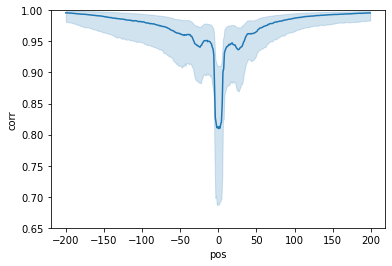

In [14]:
ax = sns.lineplot(
    data=corr_2d, x="pos", y="corr", estimator=np.median,
    errorbar=lambda x: (np.quantile(x, 0.25), np.quantile(x, 0.75))
)
plt.ylim(0.65, 1)
plt.savefig(f"./{motif}_ism_shuffle_corr_iqr.pdf")

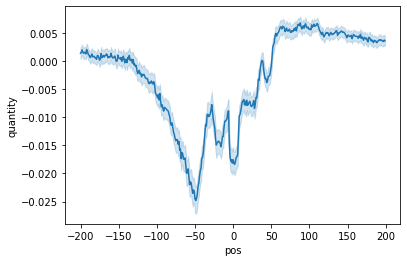

In [16]:
ax = sns.lineplot(data=quantity_2d, x="pos", y="quantity")
#plt.ylim(0.72, 1)
plt.savefig(f"./{motif}_ism_shuffle_quantity.pdf")

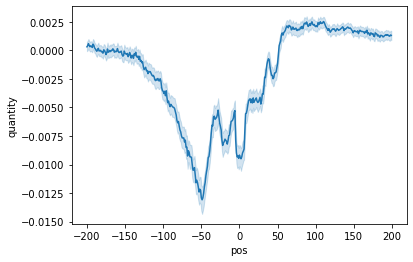

In [17]:
ax = sns.lineplot(data=log_quantity_2d, x="pos", y="quantity")
#plt.ylim(0.72, 1)
plt.savefig(f"./{motif}_ism_shuffle_log_quantity.pdf")

<AxesSubplot:>

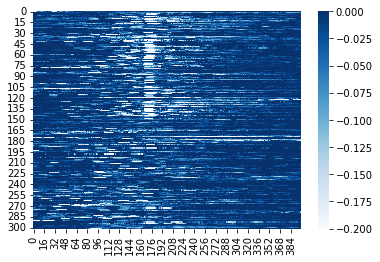

In [73]:
sns.heatmap(log_quantity_around_tss.mean(axis=-1), vmin=-0.2, vmax=0, cmap="Blues")

<AxesSubplot:>

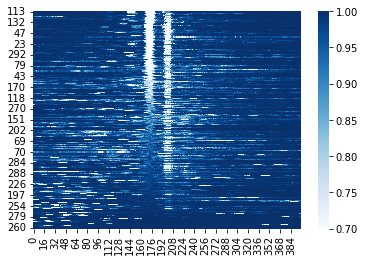

In [104]:
corr_df = pd.DataFrame(corr_around_tss)

corr_df["tata"]=corr_around_tss[:, 170:180].mean(axis=1)
corr_tata = corr_df.sort_values("tata").drop("tata", axis=1)
#sns.heatmap(pl_tata, cmap="Blues", 
sns.heatmap(corr_tata, vmax=1, vmin=0.7, cmap="Blues")

<AxesSubplot:>

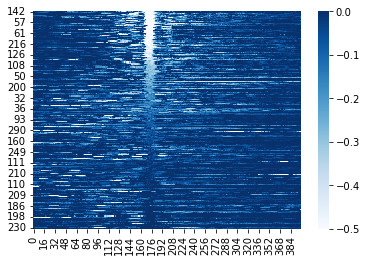

In [102]:
quantity_df = pd.DataFrame(quantity_around_tss.mean(axis=-1))

quantity_df["tata"]=quantity_around_tss[:, 170:180].mean(axis=1)
quantity_tata = quantity_df.sort_values("tata").drop("tata", axis=1)
#sns.heatmap(pl_tata, cmap="Blues", 
sns.heatmap(quantity_tata, vmax=0, vmin=-0.5, cmap="Blues")